In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset


Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 59.2MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/sms-spam-collection-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Assuming the extracted dataset is a CSV file named 'spam.csv'
# Please update the filename if it's different
df = pd.read_csv('spam.csv', encoding='latin-1')  # using encoding='latin-1' to handle special characters
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [ ]:
df.isnull().sum()

,0
label,0
message,0


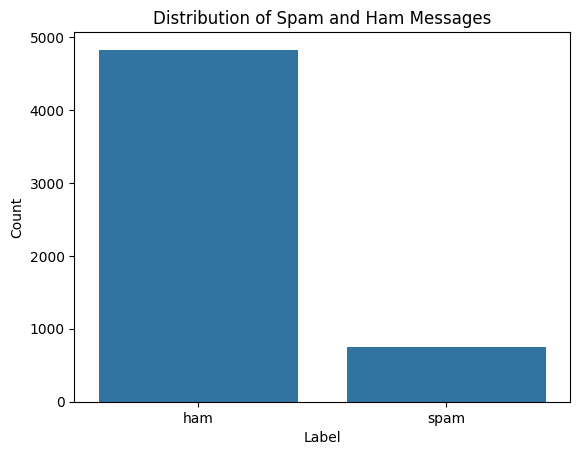

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Convert text data to numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.97847533632287,
 array([[952,  13],
        [ 11, 139]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       965\n           1       0.91      0.93      0.92       150\n\n    accuracy                           0.98      1115\n   macro avg       0.95      0.96      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n')

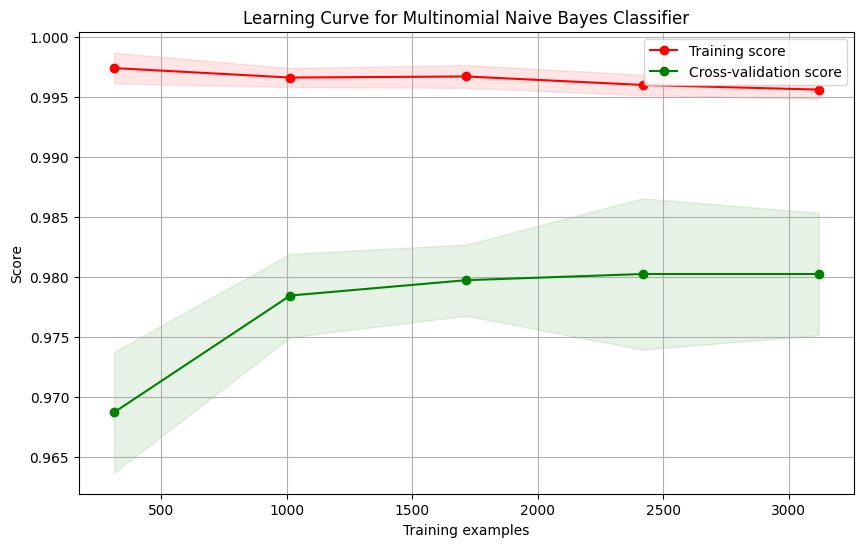

In [ ]:
# Step 10: Plot learning curve for Naive Bayes
title = "Learning Curve for Multinomial Naive Bayes Classifier"
plot_learning_curve(model, title, X_train, y_train, cv=5)

# Show the plot
plt.show()

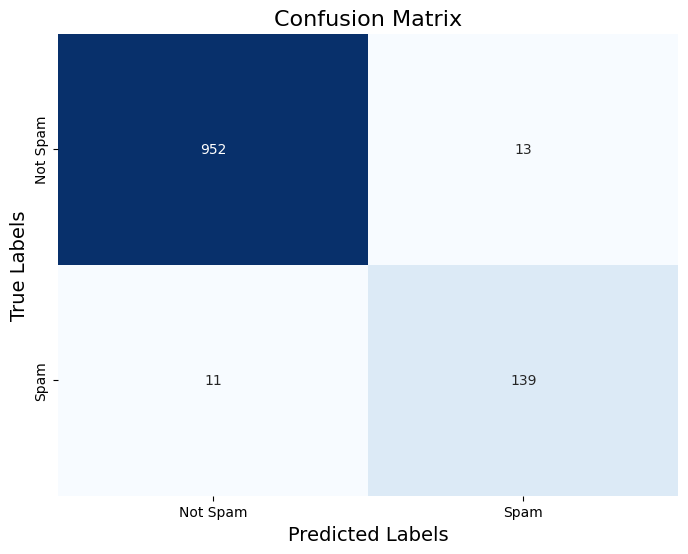

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

# Add labels, title, and adjust layout
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


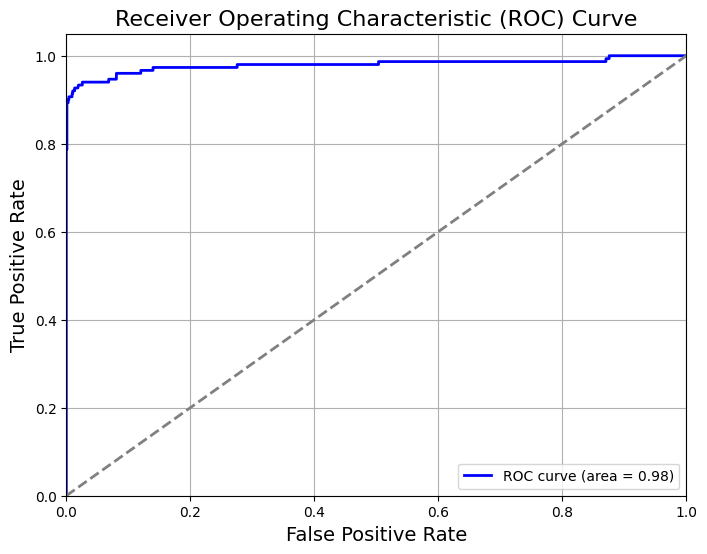

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (spam)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")

# Add grid to the plot
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with encoding specified
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')


Decision Tree Classifier Performance:
Accuracy: 0.9725

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1453
        spam       0.91      0.87      0.89       219

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



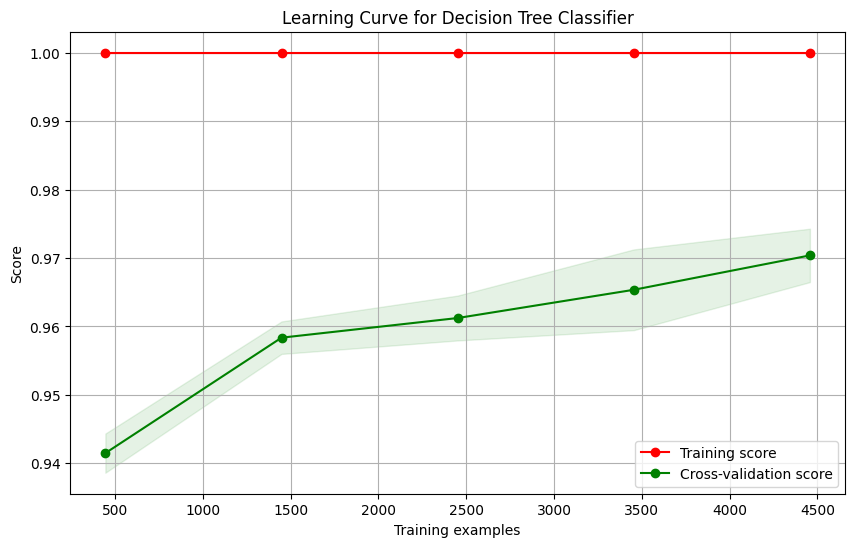

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with encoding specified
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

# Convert 'v1' to numeric values (0 for ham, 1 for spam)
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

# Preprocess the text data (vectorization)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree performance
print("\nDecision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['ham', 'spam']))

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Calculate the mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Decision Tree
title = "Learning Curve for Decision Tree Classifier"
plot_learning_curve(dt_model, title, X, y, cv=5)

# Show the plot
plt.show()


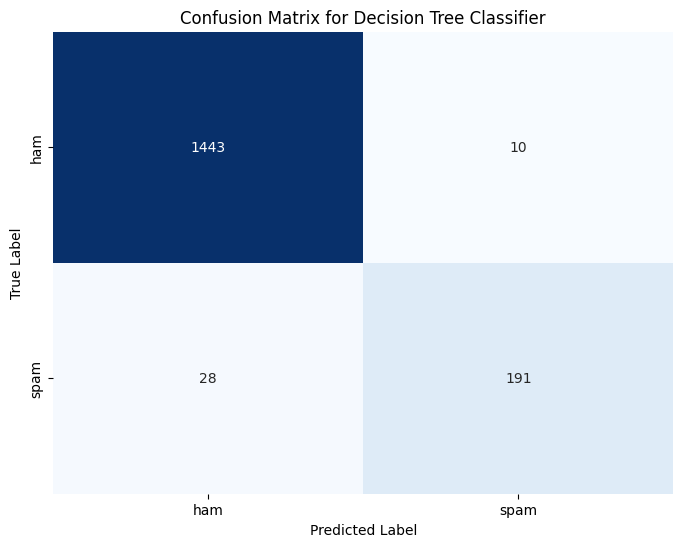

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# True labels and predicted labels (based on your previous classification report)
y_true = [0] * 1453 + [1] * 219  # 0 for 'ham', 1 for 'spam' (based on support values)
y_pred = [0] * 1443 + [1] * 10 + [0] * 28 + [1] * 191  # Approximated from precision and recall

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


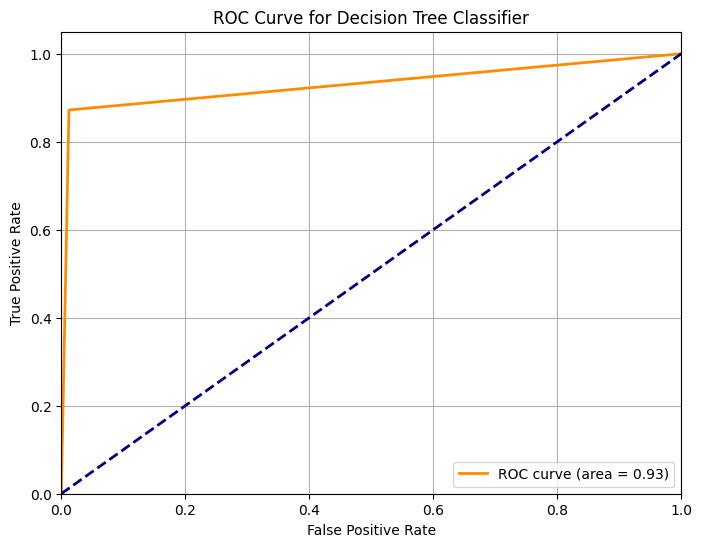

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (spam)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probability for spam (class 1)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Accuracy: 0.979066985645933
Confusion Matrix:
[[1453    0]
 [  35  184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       1.00      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



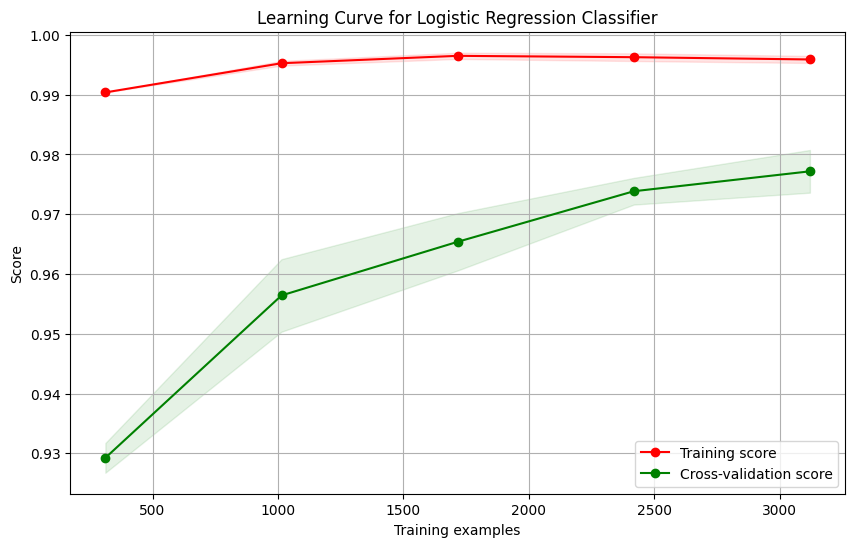

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with encoding specified
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

# Step 3: Convert 'v1' to numeric values (0 for ham, 1 for spam)
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

# Step 4: Preprocess the text data (vectorization)
# Fit the vectorizer on the entire dataset
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])  # Fit on full data (training + test)

y = df['label']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Logistic Regression model
model = LogisticRegression()  # Initialize LogisticRegression
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Step 9: Plot the learning curve

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Calculate the mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Step 10: Plot learning curve for Logistic Regression
title = "Learning Curve for Logistic Regression Classifier"
plot_learning_curve(model, title, X_train, y_train, cv=5)

# Show the plot
plt.show()


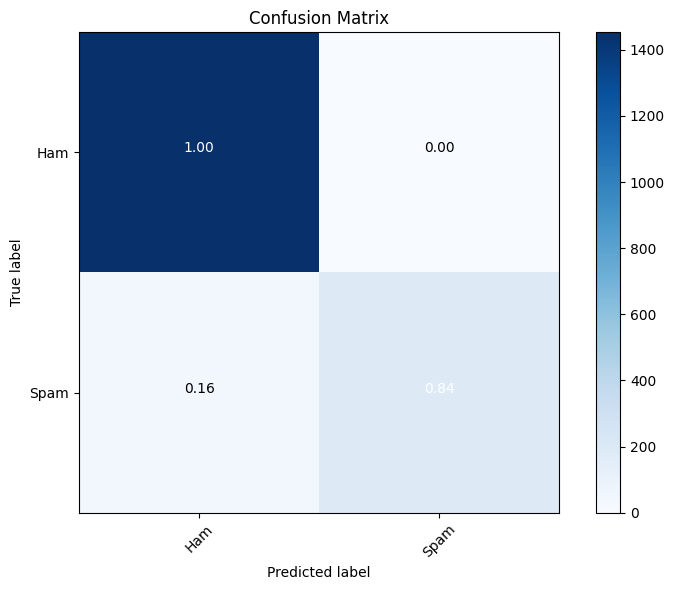

In [ ]:
import seaborn as sns

# Step to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix by row (true positive rate)
    normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    for i, j in np.ndindex(normalized_confusion_matrix.shape):
        plt.text(j, i, f"{normalized_confusion_matrix[i, j]:.2f}",
                 horizontalalignment='center',
                 color="white" if normalized_confusion_matrix[i, j] > 0.5 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Class names for the confusion matrix
class_names = ['Ham', 'Spam']

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names)


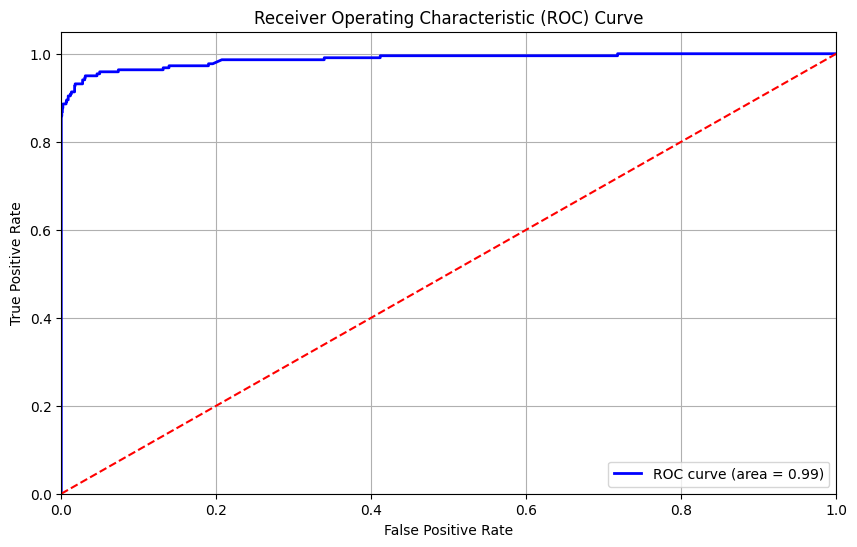

In [ ]:
from sklearn.metrics import roc_curve, auc

# Step to generate ROC curve
def plot_roc_curve(y_test, y_scores):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Get probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the 'spam' class (1)

# Plot the ROC curve
plot_roc_curve(y_test, y_scores)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['ham', 'spam']))



Random Forest Classifier Performance:
Accuracy: 0.9767

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1453
        spam       0.99      0.83      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



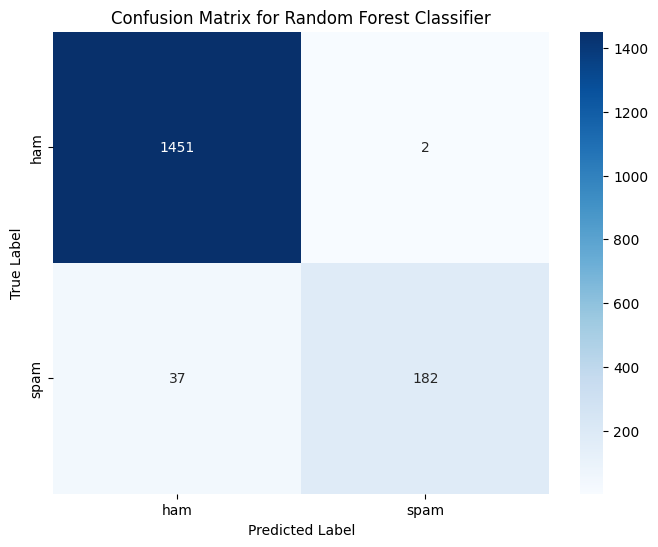

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given performance metrics
y_true = np.concatenate([np.repeat(0, 1453), np.repeat(1, 219)])  # 'ham' is 0, 'spam' is 1
y_pred = np.concatenate([np.repeat(0, 1451), [1, 1], np.repeat(1, 182), np.repeat(0, 37)])

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['ham', 'spam']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
model.fit(X_resampled, y_resampled)


LogisticRegression()

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.98116592 0.98116592 0.97307002 0.97666068 0.97845601]
Mean CV Score: 0.9781037106214425


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Scores:", cv_scores_rf)
print("Mean CV Score for Random Forest:", np.mean(cv_scores_rf))

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['ham', 'spam']))

# ROC-AUC Score
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")


Random Forest CV Scores: [0.98026906 0.97219731 0.97127469 0.96499102 0.97037702]
Mean CV Score for Random Forest: 0.9718218193235704

Random Forest Classifier Performance:
Accuracy: 0.8810

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1453
        spam       0.53      0.88      0.66       219

    accuracy                           0.88      1672
   macro avg       0.75      0.88      0.79      1672
weighted avg       0.92      0.88      0.89      1672

Random Forest ROC-AUC Score: 0.95


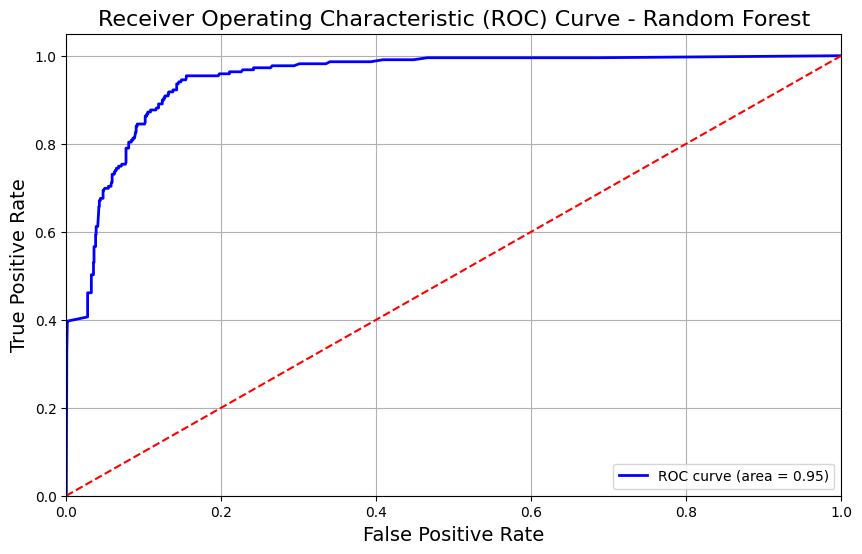

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class (spam)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for spam (class 1)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid()
plt.show()
